___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
# Checking the shape of the dataset
shape_info = data.shape

# Checking the data types
data_types = data.dtypes

# Statistical summary
summary = data.describe()

shape_info, data_types, summary


((10000, 14),
 RowNumber            int64
 CustomerId           int64
 Surname             object
 CreditScore          int64
 Geography           object
 Gender              object
 Age                  int64
 Tenure               int64
 Balance            float64
 NumOfProducts        int64
 HasCrCard            int64
 IsActiveMember       int64
 EstimatedSalary    float64
 Exited               int64
 dtype: object,
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
 count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
 mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
 std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
 min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
 25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
 50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
 75%     7500.25000  1.57

In [4]:
# Checking for missing values
missing_values = data.isnull().sum()

missing_values


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Dropping unnecessary columns
data_cleaned = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

data_cleaned.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


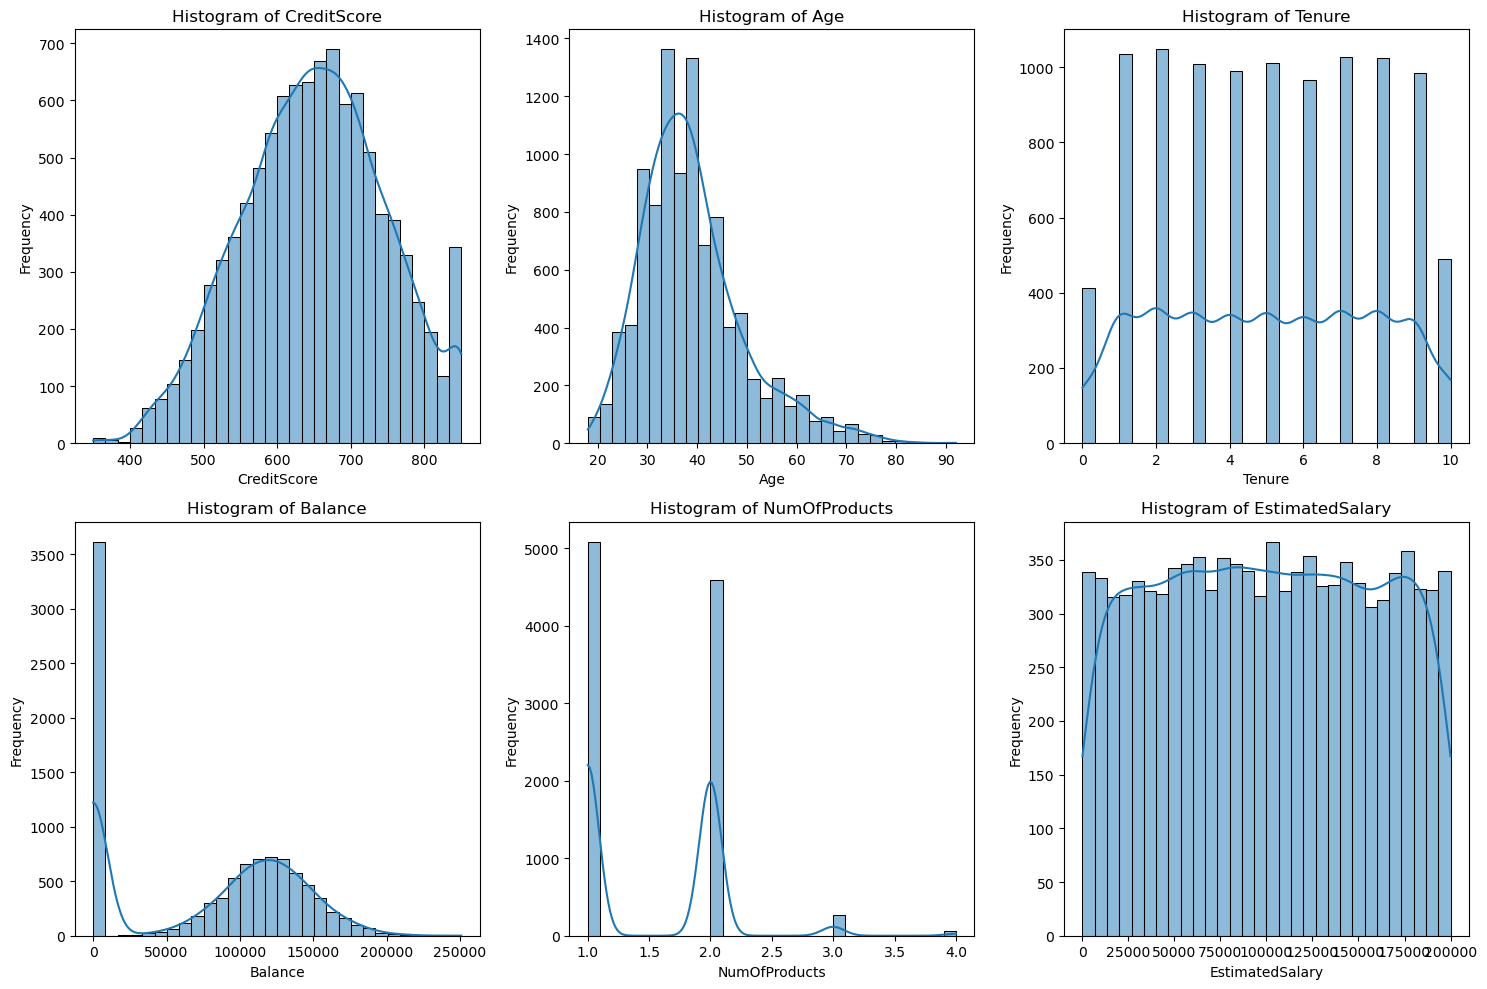

In [6]:
# Setting up the figure size
plt.figure(figsize=(15, 10))

# Histograms for numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data_cleaned[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


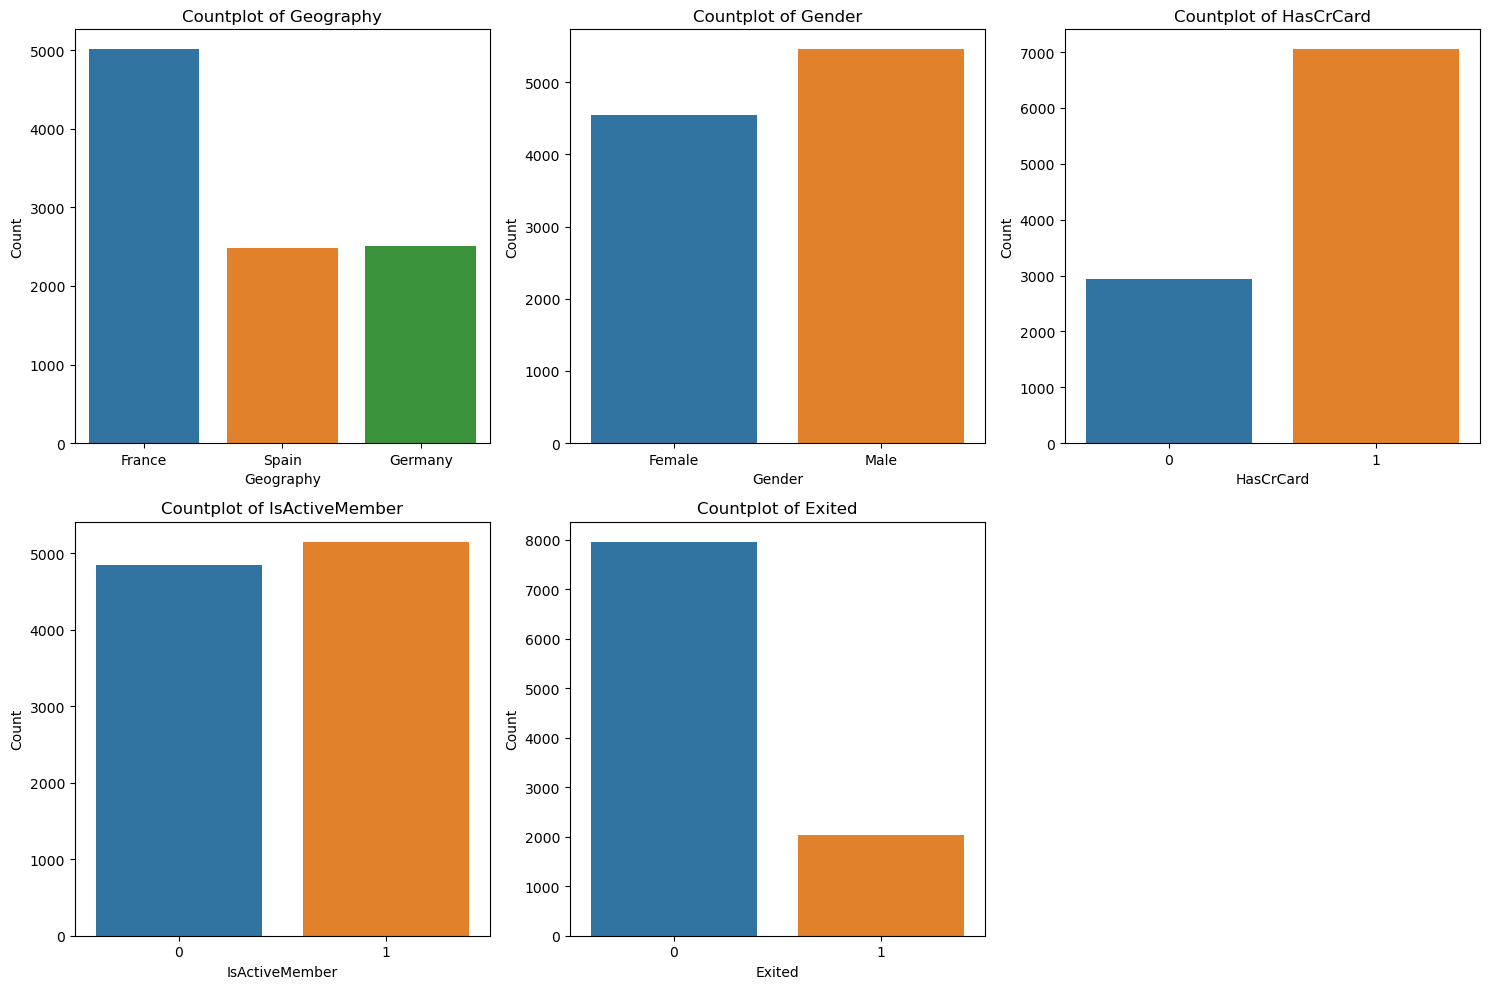

In [7]:
# Setting up the figure size
plt.figure(figsize=(15, 10))

# Countplots for categorical and binary features
categorical_binary_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for i, feature in enumerate(categorical_binary_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data_cleaned, x=feature)
    plt.title(f'Countplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


C:\Users\brho0\AppData\Local\Temp\ipykernel_23992\3797400032.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


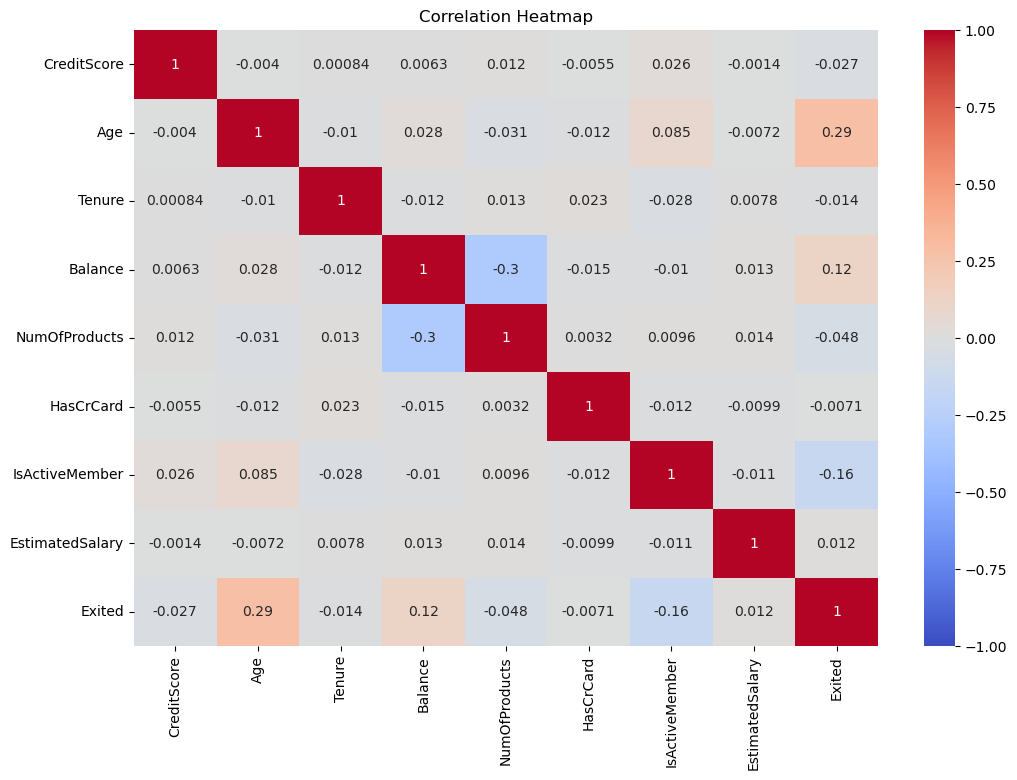

In [8]:
# Heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [9]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data_cleaned, columns=['Geography', 'Gender'], drop_first=True)

data_encoded.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into features (X) and target (y)
X = data_encoded.drop('Exited', axis=1)
y = data_encoded['Exited']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((8000, 11), (2000, 11))

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.layers import Dense

# Initialize the neural network model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=6, activation='relu', input_dim=11))

# Second hidden layer
model.add(Dense(units=6, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',Recall(name='recall')])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 72        
                                                                 
 dense_13 (Dense)            (None, 6)                 42        
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# Train the model
history = model.fit(X_train_scaled, y_train, batch_size=10, epochs=100, validation_data=(X_test_scaled, y_test))


Epoch 1/100
800/800 [==============================] - 2s 1ms/step - loss: 0.5112 - accuracy: 0.7556 - recall: 0.0620 - val_loss: 0.4344 - val_accuracy: 0.8055 - val_recall: 0.0102
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4420 - accuracy: 0.7972 - recall: 0.0304 - val_loss: 0.4125 - val_accuracy: 0.8150 - val_recall: 0.0738
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4277 - accuracy: 0.8059 - recall: 0.1058 - val_loss: 0.4020 - val_accuracy: 0.8235 - val_recall: 0.1603
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4165 - accuracy: 0.8217 - recall: 0.2287 - val_loss: 0.3922 - val_accuracy: 0.8370 - val_recall: 0.2977
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4048 - accuracy: 0.8261 - recall: 0.2737 - val_loss: 0.3836 - val_accuracy: 0.8390 - val_recall: 0.3308
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3946 - accuracy: 0

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

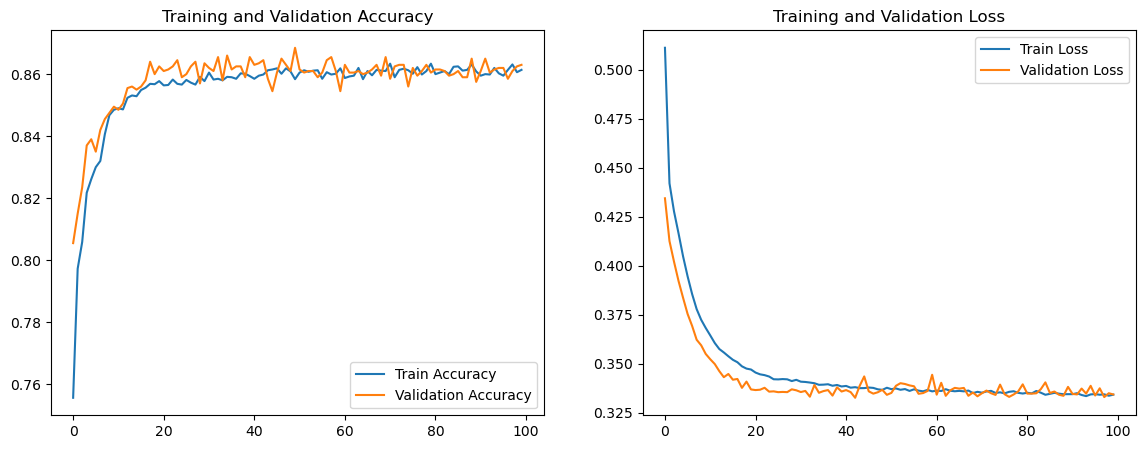

In [40]:
# Plotting the training history
plt.figure(figsize=(14, 5))

# Plotting the training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))


63/63 [==============================] - 0s 680us/step
[[1544   63]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



63/63 [==============================] - 0s 635us/step


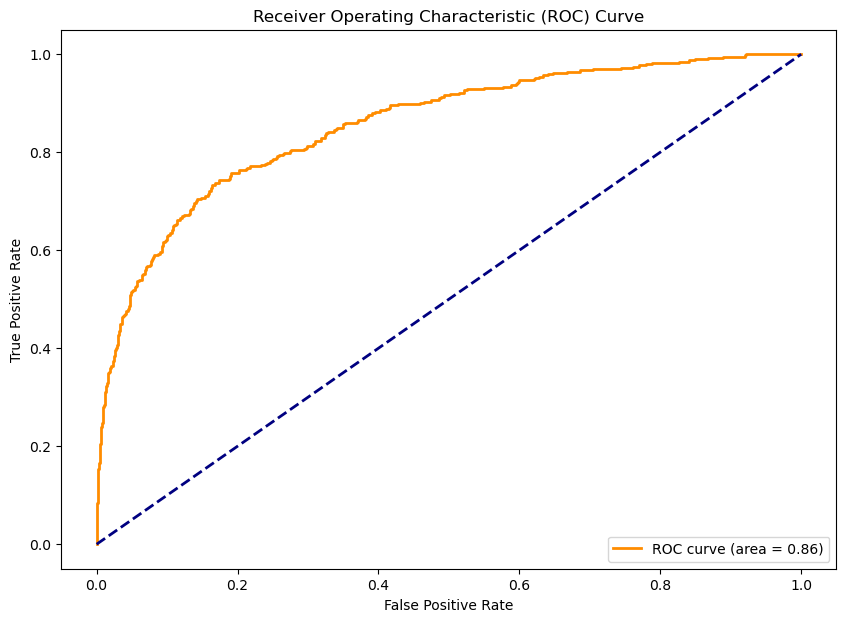

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

# Getting the probabilities
y_pred_probs = model.predict(X_test_scaled)

# Computing ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)

# Plotting the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [46]:
from sklearn.utils.class_weight import compute_class_weight

# Calculating class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}


In [47]:
# Train the model with class weights
history_weighted = model.fit(X_train_scaled, y_train, batch_size=10, epochs=100, validation_data=(X_test_scaled, y_test), class_weight=class_weights_dict)


Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4488 - accuracy: 0.8051 - recall: 0.7482 - val_loss: 0.4905 - val_accuracy: 0.7695 - val_recall: 0.7761
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4479 - accuracy: 0.8050 - recall: 0.7603 - val_loss: 0.4287 - val_accuracy: 0.8250 - val_recall: 0.7277
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4485 - accuracy: 0.8062 - recall: 0.7494 - val_loss: 0.4607 - val_accuracy: 0.7935 - val_recall: 0.7583
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4480 - accuracy: 0.8046 - recall: 0.7530 - val_loss: 0.4742 - val_accuracy: 0.7810 - val_recall: 0.7557
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4479 - accuracy: 0.8076 - recall: 0.7470 - val_loss: 0.4608 - val_accuracy: 0.7935 - val_recall: 0.7455
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4481 - accuracy: 0

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

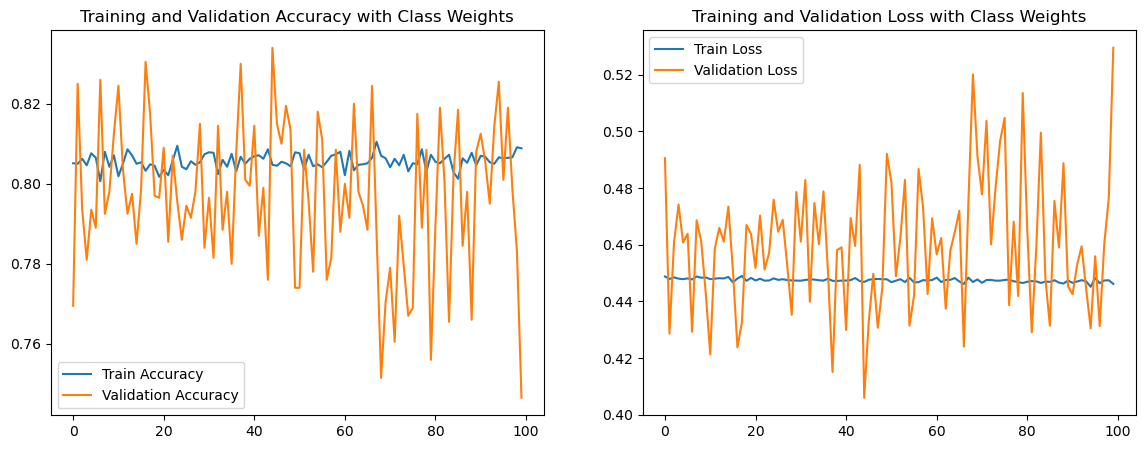

In [48]:
# Plotting the training history with class weights
plt.figure(figsize=(14, 5))

# Plotting the training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_weighted.history['accuracy'], label='Train Accuracy')
plt.plot(history_weighted.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy with Class Weights')

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_weighted.history['loss'], label='Train Loss')
plt.plot(history_weighted.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss with Class Weights')

plt.show()


In [49]:
# Making predictions with class weights
y_pred_ = model.predict(X_test_scaled)
y_pred_weighted = (y_pred_ > 0.5).astype(int).flatten()

# Confusion Matrix
print(confusion_matrix(y_test, y_pred_weighted))

# Classification Report
print(classification_report(y_test, y_pred_weighted))


63/63 [==============================] - 0s 681us/step
[[1177  430]
 [  77  316]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1607
           1       0.42      0.80      0.55       393

    accuracy                           0.75      2000
   macro avg       0.68      0.77      0.69      2000
weighted avg       0.84      0.75      0.77      2000



63/63 [==============================] - 0s 600us/step


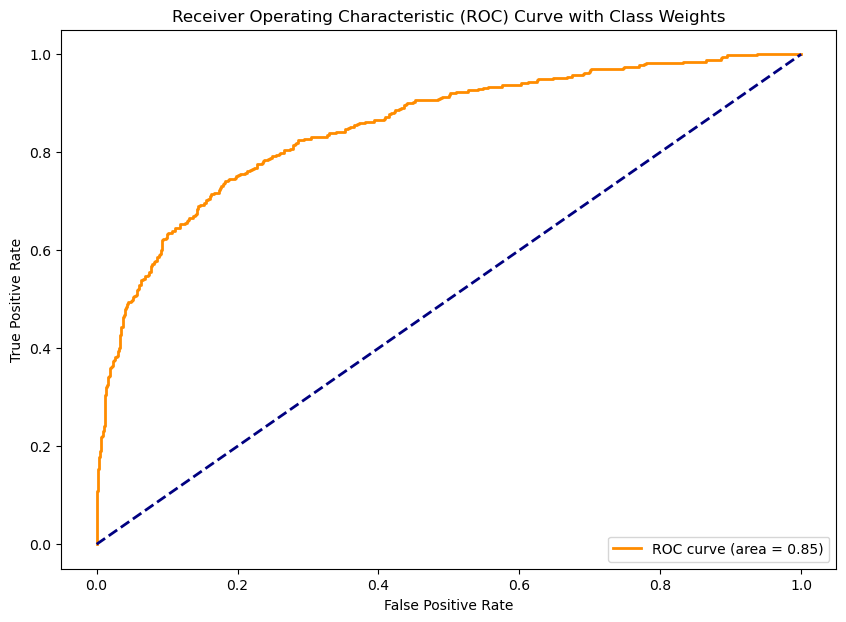

In [50]:
# Getting the probabilities with class weights
y_pred_probs_weighted = model.predict(X_test_scaled)

# Computing ROC curve and ROC AUC
fpr_weighted, tpr_weighted, thresholds_weighted = roc_curve(y_test, y_pred_probs_weighted)
roc_auc_weighted = roc_auc_score(y_test, y_pred_probs_weighted)

# Plotting the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_weighted, tpr_weighted, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_weighted:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Class Weights')
plt.legend(loc="lower right")
plt.show()


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [51]:
from tensorflow.keras.optimizers import Adam

# Initialize the neural network model
model_high_lr = Sequential()

# Layers
model_high_lr.add(Dense(units=6, activation='relu', input_dim=11))
model_high_lr.add(Dense(units=6, activation='relu'))
model_high_lr.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a higher learning rate
optimizer_high_lr = Adam(learning_rate=0.01)
model_high_lr.compile(optimizer=optimizer_high_lr, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history_high_lr = model_high_lr.fit(X_train_scaled, y_train, batch_size=10, epochs=100, validation_data=(X_test_scaled, y_test), class_weight=class_weights_dict)


Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5411 - accuracy: 0.7206 - val_loss: 0.5034 - val_accuracy: 0.7495
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4914 - accuracy: 0.7663 - val_loss: 0.5171 - val_accuracy: 0.7525
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4847 - accuracy: 0.7722 - val_loss: 0.4346 - val_accuracy: 0.8020
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4783 - accuracy: 0.7820 - val_loss: 0.4809 - val_accuracy: 0.8020
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4754 - accuracy: 0.7915 - val_loss: 0.4853 - val_accuracy: 0.7880
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4755 - accuracy: 0.7993 - val_loss: 0.4868 - val_accuracy: 0.7675
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4734 - accuracy: 0.7947 - val_loss: 0.4559 - val_accuracy: 0.7980

### Add Dropout Layer

In [52]:
from tensorflow.keras.layers import Dropout

# Initialize the model with dropout
model_dropout = Sequential()

# Layers with dropout
model_dropout.add(Dense(units=6, activation='relu', input_dim=11))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(units=6, activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(units=1, activation='sigmoid'))

# Compile
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history_dropout = model_dropout.fit(X_train_scaled, y_train, batch_size=10, epochs=100, validation_data=(X_test_scaled, y_test), class_weight=class_weights_dict)


Epoch 1/100
800/800 [==============================] - 2s 1ms/step - loss: 0.7623 - accuracy: 0.6423 - val_loss: 0.6522 - val_accuracy: 0.5840
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.6447 - accuracy: 0.5741 - val_loss: 0.6246 - val_accuracy: 0.6430
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.6202 - accuracy: 0.6204 - val_loss: 0.5879 - val_accuracy: 0.6880
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.6076 - accuracy: 0.6481 - val_loss: 0.5934 - val_accuracy: 0.6780
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.6029 - accuracy: 0.6565 - val_loss: 0.5655 - val_accuracy: 0.6995
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.6025 - accuracy: 0.6689 - val_loss: 0.5737 - val_accuracy: 0.7050
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5995 - accuracy: 0.6694 - val_loss: 0.5870 - val_accuracy: 0.6890

### Add Early Stop

#### Monitor the "val_loss" as metric

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_loss = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

history_early_stop_loss = model.fit(X_train_scaled, y_train, batch_size=10, epochs=500, validation_data=(X_test_scaled, y_test), callbacks=[early_stop_loss], class_weight=class_weights_dict)


Epoch 1/500
800/800 [==============================] - 1s 1ms/step - loss: 0.4509 - accuracy: 0.8045 - recall: 0.7500 - val_loss: 0.4725 - val_accuracy: 0.7855 - val_recall: 0.7735
Epoch 2/500
800/800 [==============================] - 1s 1ms/step - loss: 0.4508 - accuracy: 0.8046 - recall: 0.7573 - val_loss: 0.4486 - val_accuracy: 0.8010 - val_recall: 0.7532
Epoch 3/500
800/800 [==============================] - 1s 1ms/step - loss: 0.4496 - accuracy: 0.8060 - recall: 0.7530 - val_loss: 0.4926 - val_accuracy: 0.7675 - val_recall: 0.7913
Epoch 4/500
800/800 [==============================] - 1s 1ms/step - loss: 0.4497 - accuracy: 0.8031 - recall: 0.7543 - val_loss: 0.4572 - val_accuracy: 0.8005 - val_recall: 0.7354
Epoch 5/500
800/800 [==============================] - 1s 1ms/step - loss: 0.4496 - accuracy: 0.8058 - recall: 0.7506 - val_loss: 0.4439 - val_accuracy: 0.8115 - val_recall: 0.7506
Epoch 6/500
800/800 [==============================] - 1s 1ms/step - loss: 0.4497 - accuracy: 0

#### Monitor the "val_recall" as metric

In [43]:
early_stop_recall = EarlyStopping(monitor='val_recall', mode='max', verbose=1, patience=25)

history_early_stop_recall = model.fit(X_train_scaled, y_train, batch_size=10, epochs=500, validation_data=(X_test_scaled, y_test), callbacks=[early_stop_recall], class_weight=class_weights_dict)


Epoch 1/500
800/800 [==============================] - 1s 1ms/step - loss: 0.4609 - accuracy: 0.8031 - recall: 0.7397 - val_loss: 0.4951 - val_accuracy: 0.7740 - val_recall: 0.8142
Epoch 2/500
800/800 [==============================] - 1s 1ms/step - loss: 0.4532 - accuracy: 0.7964 - recall: 0.7536 - val_loss: 0.4664 - val_accuracy: 0.7890 - val_recall: 0.7710
Epoch 3/500
800/800 [==============================] - 1s 1ms/step - loss: 0.4531 - accuracy: 0.7980 - recall: 0.7470 - val_loss: 0.4531 - val_accuracy: 0.7980 - val_recall: 0.7557
Epoch 4/500
800/800 [==============================] - 1s 1ms/step - loss: 0.4527 - accuracy: 0.8026 - recall: 0.7470 - val_loss: 0.4790 - val_accuracy: 0.7785 - val_recall: 0.7837
Epoch 5/500
800/800 [==============================] - 1s 1ms/step - loss: 0.4511 - accuracy: 0.8019 - recall: 0.7482 - val_loss: 0.4817 - val_accuracy: 0.7800 - val_recall: 0.7812
Epoch 6/500
800/800 [==============================] - 1s 1ms/step - loss: 0.4517 - accuracy: 0

## Optuna

In [53]:
import optuna

def objective(trial):
    # Define hyperparameters using trial.suggest_...
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    units_layer1 = trial.suggest_int('units_layer1', 4, 12)
    units_layer2 = trial.suggest_int('units_layer2', 4, 12)
    
    # Create and compile the model
    model_optuna = Sequential()
    model_optuna.add(Dense(units=units_layer1, activation='relu', input_dim=11))
    model_optuna.add(Dense(units=units_layer2, activation='relu'))
    model_optuna.add(Dense(units=1, activation='sigmoid'))
    model_optuna.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model and return a metric to be optimized
    history = model_optuna.fit(X_train_scaled, y_train, batch_size=10, epochs=50, validation_data=(X_test_scaled, y_test), verbose=0, class_weight=class_weights_dict)
    
    # Return the validation accuracy for the last epoch as the metric to be optimized
    return history.history['val_accuracy'][-1]

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print out the best hyperparameters
print(study.best_params)


[I 2023-10-30 16:04:50,823] A new study created in memory with name: no-name-d1862ab3-2b48-453c-8f62-65bce954e758
[I 2023-10-30 16:05:33,508] Trial 0 finished with value: 0.7904999852180481 and parameters: {'lr': 0.00038292015687224536, 'units_layer1': 7, 'units_layer2': 9}. Best is trial 0 with value: 0.7904999852180481.
[I 2023-10-30 16:06:15,915] Trial 1 finished with value: 0.7605000138282776 and parameters: {'lr': 0.0009057833939692543, 'units_layer1': 8, 'units_layer2': 6}. Best is trial 0 with value: 0.7904999852180481.
[I 2023-10-30 16:06:58,096] Trial 2 finished with value: 0.7730000019073486 and parameters: {'lr': 0.0014820877163240164, 'units_layer1': 5, 'units_layer2': 12}. Best is trial 0 with value: 0.7904999852180481.
[I 2023-10-30 16:07:40,315] Trial 3 finished with value: 0.7835000157356262 and parameters: {'lr': 0.0037875424189556506, 'units_layer1': 8, 'units_layer2': 9}. Best is trial 0 with value: 0.7904999852180481.
[I 2023-10-30 16:08:22,472] Trial 4 finished wit

{'lr': 0.0023586917556320075, 'units_layer1': 9, 'units_layer2': 11}


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

Epoch 1/100
800/800 [==============================] - 2s 1ms/step - loss: 0.6004 - accuracy: 0.6689 - val_loss: 0.5406 - val_accuracy: 0.7220
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5286 - accuracy: 0.7197 - val_loss: 0.4944 - val_accuracy: 0.7665
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4979 - accuracy: 0.7530 - val_loss: 0.5205 - val_accuracy: 0.7425
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4888 - accuracy: 0.7619 - val_loss: 0.4877 - val_accuracy: 0.7615
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4841 - accuracy: 0.7710 - val_loss: 0.5072 - val_accuracy: 0.7490
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4795 - accuracy: 0.7721 - val_loss: 0.4766 - val_accuracy: 0.7795
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4788 - accuracy: 0.7716 - val_loss: 0.4878 - val_accuracy: 0.7725

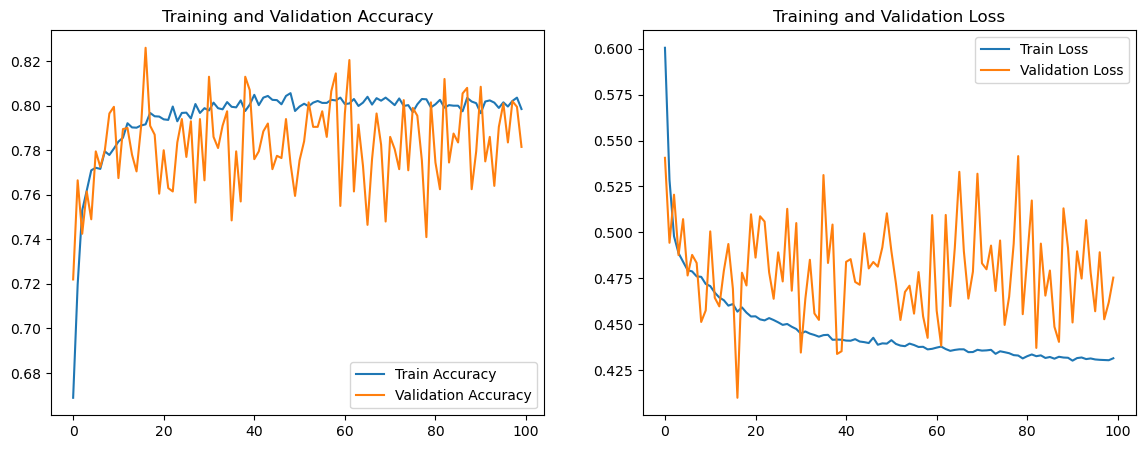

In [54]:
best_params = study.best_params

# Train the model with the best parameters
model_best = Sequential()
model_best.add(Dense(units=best_params['units_layer1'], activation='relu', input_dim=11))
model_best.add(Dense(units=best_params['units_layer2'], activation='relu'))
model_best.add(Dense(units=1, activation='sigmoid'))
model_best.compile(optimizer=Adam(learning_rate=best_params['lr']), loss='binary_crossentropy', metrics=['accuracy'])
history_best = model_best.fit(X_train_scaled, y_train, batch_size=10, epochs=100, validation_data=(X_test_scaled, y_test), verbose=1, class_weight=class_weights_dict)

# Plotting the training history
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_best.history['accuracy'], label='Train Accuracy')
plt.plot(history_best.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_best.history['loss'], label='Train Loss')
plt.plot(history_best.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions
y_pred_b = model.predict(X_test_scaled)
y_pred_best = (y_pred_ > 0.5).astype(int).flatten()


# Confusion Matrix
print(confusion_matrix(y_test, y_pred_best))

# Classification Report
print(classification_report(y_test, y_pred_best))


63/63 [==============================] - 0s 693us/step
[[1177  430]
 [  77  316]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1607
           1       0.42      0.80      0.55       393

    accuracy                           0.75      2000
   macro avg       0.68      0.77      0.69      2000
weighted avg       0.84      0.75      0.77      2000



63/63 [==============================] - 0s 674us/step


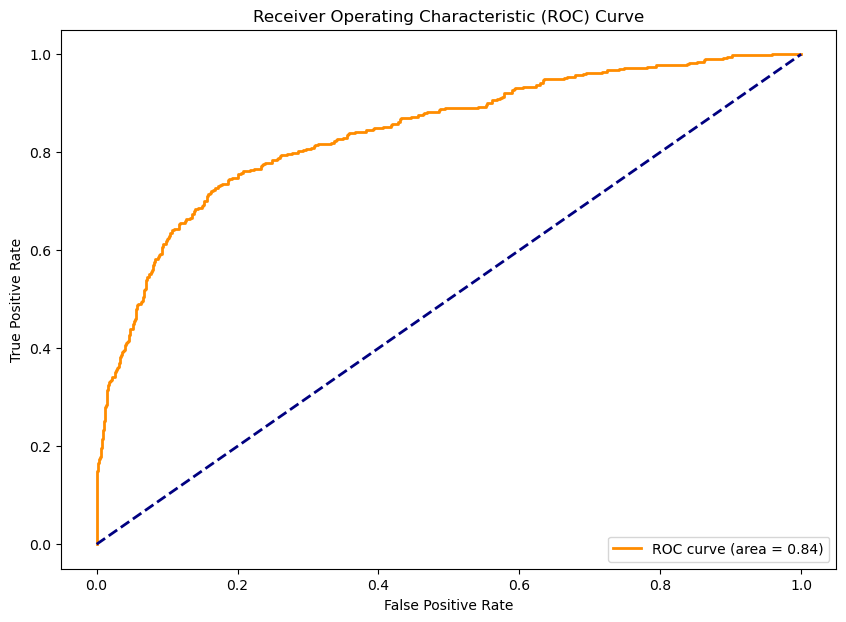

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

# Getting the probabilities
y_pred_probs_best = model_best.predict(X_test_scaled)

# Compute ROC curve and ROC AUC
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_probs_best)
roc_auc_best = roc_auc_score(y_test, y_pred_probs_best)

# Plot
plt.figure(figsize=(10, 7))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___